# Genetic Algorithm 
## Name: Rounik Prashar
## Roll No: BTech/60023/19

In [31]:
## Defining function to maximize
def f(x): return 3*x**3 - 2*x**2 + x + 10

def fun(w,x,y,z):
    return w**3 + x**2 - y**2 - z**2 + 2*y*z - 3*w*x + w*z - x*y + 2

In [32]:
# Generating Random Population
SIZE = 4

# Defing range 0 to 31 inclusive
LOWER_LIM = 0
UPPER_LIM = 15

In [37]:
import random

def getRandomInt():
    return random.randint(LOWER_LIM, UPPER_LIM)

def getRandomIndividual():
    return (getRandomInt(), getRandomInt(), getRandomInt(), getRandomInt())

def getRandomPopulation():
    return [getRandomIndividual() for _ in range(SIZE)]

In [34]:
# Encoding
def encodeTuple(individual):
    enc = []
    for val in individual:
        enc += encodeInt(val)
    return enc

def encodeInt(number):
    binary = bin(number)[2:]
    padding = (len(bin(UPPER_LIM)[2:]) - len(binary))
    return [int(bit) for bit in (padding*'0')+binary]

# Decoding
def decodeInt(binArr):
    binStr = ""
    for val in binArr:
        binStr += str(val)
    return int(binStr,2)

def decodeList(binArr):
    l = len(binArr)
    return (decodeInt(binArr[0:l//4]), 
            decodeInt(binArr[l//4:l//2]), 
            decodeInt(binArr[l//2:int(3*l/4)]), 
            decodeInt(binArr[int(3*l/4):]))

In [39]:
# Calculating Fitness
# def getFitness(population): return [f(x) for x in population]

def getFitness(population):
    pass

def getIndividualFitness(individual):
    return fun(individual[0], individual[1], individual[2], individual[3])


# Encoding Population (Binary)
def getEncodedPopulation(population): return [encode(individual) for individual in population]


(10, 12, 2, 14)


In [83]:
# Printing the initial Population
def printPopulation(population, encodedPopulation, fitness):
    print('C/No.\tPopulation\tEncoded\t\t\tFitness')
    for i in range(SIZE): print(f'{i+1}\t{population[i]}\t\t{encodedPopulation[i]}\t\t{fitness[i]}')
    print('Avg. Fitness =', sum(fitness)/len(fitness))

In [11]:
# Creating Mating Pool
def getParents(fitness, encodedPopulation):
    zipped = zip(fitness, encodedPopulation)
    zipped_population = [element for element in sorted(zipped, reverse = True)]
    # Selection of the fittest
    parents = zipped_population[:int(SIZE/2)]
    return parents

In [156]:
# Single Point Crossover
def crossover(first, second):
    crossOverPoint = random.randint(0, len(first)-1)
    for i in range(crossOverPoint, len(first)):
        first[i],second[i] = second[i],first[i]
    return first,second

In [365]:
# Mutation
MUTATION_CHANCE = 0.05

def mutatePopulation(population):
    if (random.random() >= MUTATION_CHANCE):
        encodedPopulation = [encode(ind) for ind in population]
#         print(encodedPopulation)

        index = random.randint(0,len(encodedPopulation)-1)
        encodedPopulation[index] = mutateIndividual(encodedPopulation[index])

#         print(encodedPopulation)
        return [decode(enc) for enc in encodedPopulation]
    else:
        return population
    
def swapMutation(encodecIndividual):
    firstIndex = random.randint(0,len(encodecIndividual)-1)
    secondIndex = random.randint(0,len(encodecIndividual)-1)
    while(secondIndex == firstIndex):
        secondIndex = random.randint(0,len(encodecIndividual)-1)
    encodecIndividual[firstIndex], encodecIndividual[secondIndex] = encodecIndividual[secondIndex], encodecIndividual[firstIndex]

def invertMutation(encodedIndividual):
    index = random.randint(0, len(encodedIndividual)-1)
    encodedIndividual[index] = int(encodedIndividual[index]) ^ 1

def mutateIndividual(encodedIndividual):
    invertMutation(encodedIndividual)
    return encodedIndividual

In [330]:
def getNewPopulation(fitness, encodedPopulation):
    parents = getParents(fitness, encodedPopulation)
    
    children = []
    for i in range(0,len(parents)-1):
        firstOffspring, secondOffspring = crossover(parents[i][1], parents[i+1][1])
        children.append(firstOffspring)
        children.append(secondOffspring)
    
    newPopulation = [decode(ele) for ele in encodedPopulation + children]
    newFitness = getFitness(newPopulation)
    
    newPopulation.sort(reverse = True)
    
    # Survival of the fittest 
    newPopulation = newPopulation[0:SIZE]
#     print(newPopulation)
    
    # Mutation
    mutated_population = mutatePopulation(newPopulation)
    if(getAvgFitness(mutated_population) > getAvgFitness(newPopulation)):
#         print('mutated population: ', mutated_population)
        newPopulation = mutated_population
    
    return newPopulation

def getAvgFitness(population):
    return sum(getFitness(population))/len(population)

In [371]:
def main():
    # Initial Population
    population = getRandomPopulation()
    
    # Calculating Fitness
    fitness = getFitness(population)
    avg_fitness = sum(fitness)/len(fitness)
    
    # Encoding Population (Binary)
    encodedPopulation = getEncodedPopulation(population)
    
    # Printing initial population
    print('Initial Population: ', population)
    printPopulation(population, encodedPopulation, fitness)
    
    MAX_GENERATIONS = 1000
    STR_LIMIT = 10
    streak = 0
    ACC_ERROR = 0.001
    
    avgFitness = [avg_fitness]
    
    for gen in range(1,MAX_GENERATIONS+1):
        newPopulation = getNewPopulation(fitness, encodedPopulation)
        encodedPopulation = getEncodedPopulation(newPopulation)
        fitness = getFitness(newPopulation)
        
        print("\n------------------------------------- GEN", gen, "-------------------------------------")
        printPopulation(newPopulation, encodedPopulation, fitness)
        
        new_avg_fitness = sum(fitness)/len(fitness)
        avgFitness.append(new_avg_fitness)
            
        if(abs(new_avg_fitness - avg_fitness) <= ACC_ERROR):
            streak+=1
        else:   
            streak = 0       
        if(streak >= STR_LIMIT):
            break
        avg_fitness = new_avg_fitness
    
    return avgFitness

Initial Population:  [25, 30, 21, 1]
C/No.	Population	Encoded			Fitness
1	25		[1, 1, 0, 0, 1]		45660
2	30		[1, 1, 1, 1, 0]		79240
3	21		[1, 0, 1, 0, 1]		26932
4	1		[0, 0, 0, 0, 1]		12
Avg. Fitness = 37961.0
[29, 29, 26, 26]
mutated population:  [29, 29, 26, 27]

------------------------------------- GEN 1 -------------------------------------
C/No.	Population	Encoded			Fitness
1	29		[1, 1, 1, 0, 1]		71524
2	29		[1, 1, 1, 0, 1]		71524
3	26		[1, 1, 0, 1, 0]		51412
4	27		[1, 1, 0, 1, 1]		57628
Avg. Fitness = 63022.0
[29, 29, 29, 29]
mutated population:  [29, 29, 31, 29]

------------------------------------- GEN 2 -------------------------------------
C/No.	Population	Encoded			Fitness
1	29		[1, 1, 1, 0, 1]		71524
2	29		[1, 1, 1, 0, 1]		71524
3	31		[1, 1, 1, 1, 1]		87492
4	29		[1, 1, 1, 0, 1]		71524
Avg. Fitness = 75516.0
[31, 31, 29, 29]

------------------------------------- GEN 3 -------------------------------------
C/No.	Population	Encoded			Fitness
1	31		[1, 1, 1, 1, 1]		87492
2	31	

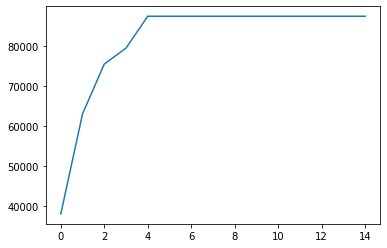

In [408]:
if __name__ == '__main__':
    avg = main()
    plotGraph(avg)